#Diamond Price Prediction




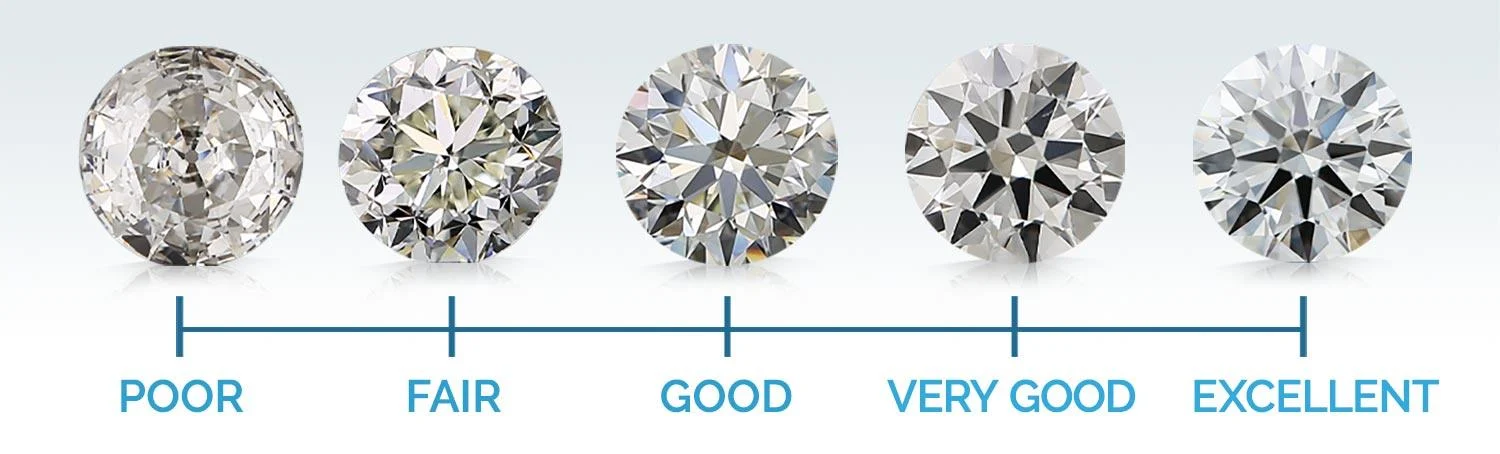

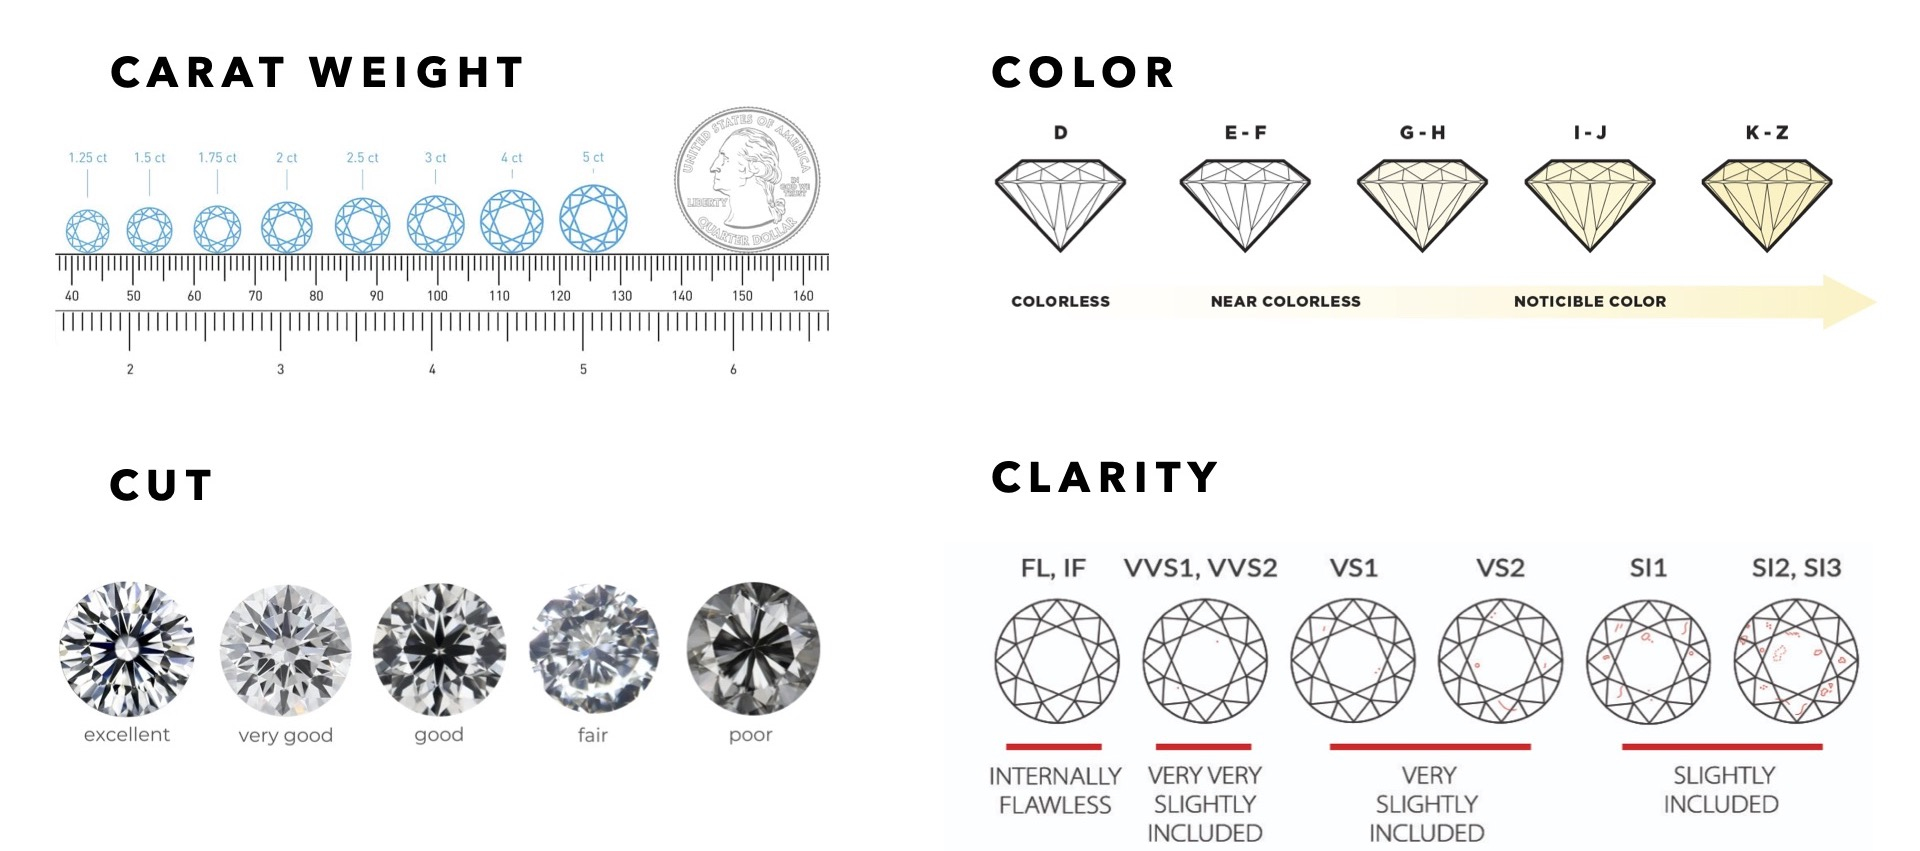

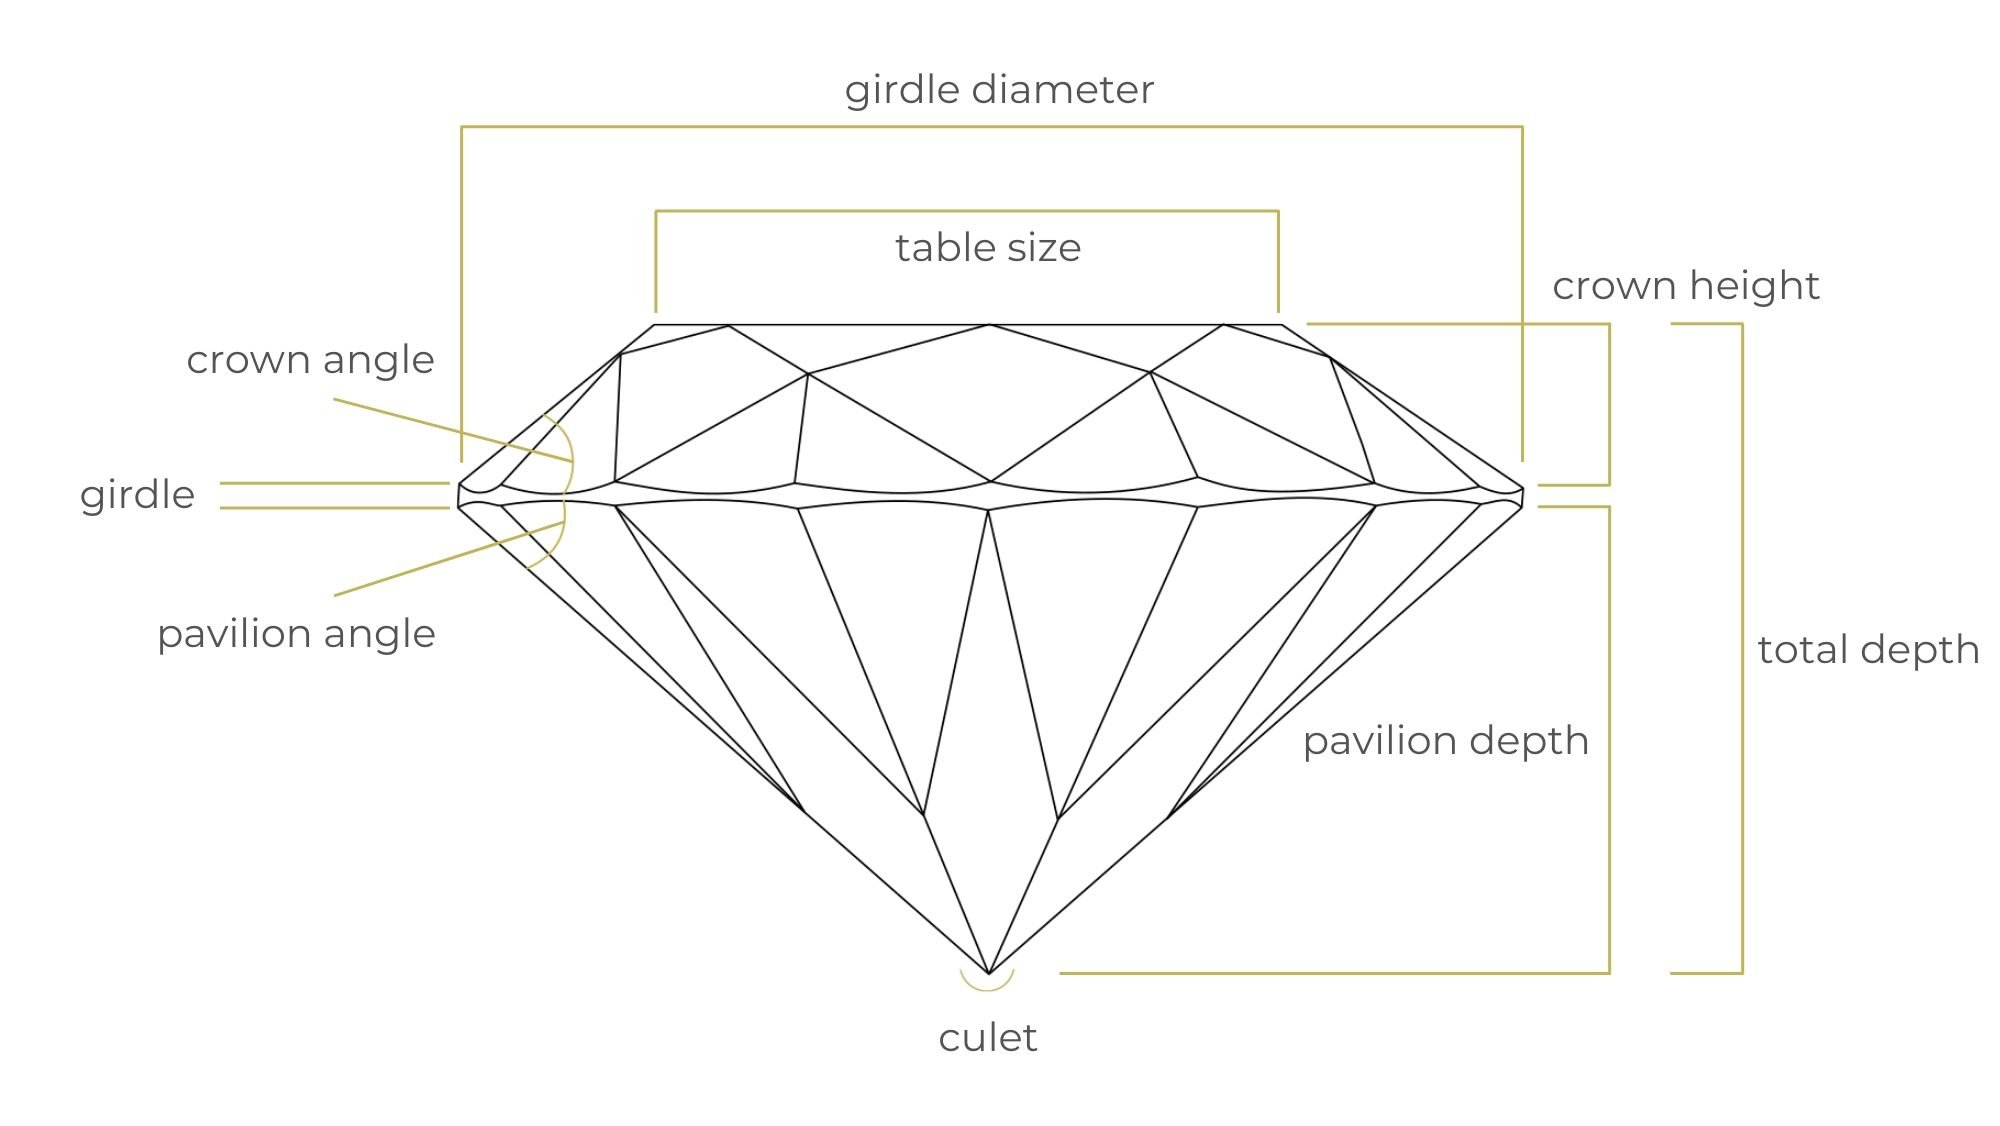

#Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

#Content
**price** price in US dollars (\$326--\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond color, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x length** in mm (0--10.74)

**y width** in mm (0--58.9)

**z depth** in mm (0--31.8)

**depth total** depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table width** of the top of diamond relative to widest point (43--95)
#Files
##train.csv - the training set
##test.csv - the test set

In [90]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC, LinearSVC 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis 
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score 
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

#Reading our Data

In [91]:
data = pd.read_csv('train.csv') 

In [92]:
testData = pd.read_csv('test.csv') 

#Understanding our dataset

In [93]:
data

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [94]:
testData

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [95]:
data.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [96]:
corr_matrix=data.corr()
corr_matrix['price'].sort_values(ascending=False)

<ipython-input-96-1cf31db57ec0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [98]:
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
571,572,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
903,904,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
1221,1222,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
4980,4981,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
6765,6766,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
11221,11222,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
13727,13728,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
14265,14266,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
16971,16972,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21061,21062,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0


In [99]:
testData.loc[(testData['x']==0) | (testData['y']==0) | (testData['z']==0)]

,Id,carat,cut,color,clarity,depth,table,x,y,z
2082,2083,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.0,0.0
3294,3295,1.56,Ideal,G,VS2,62.2,54.0,0.0,0.0,0.0
7053,7054,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0


#Visualization data

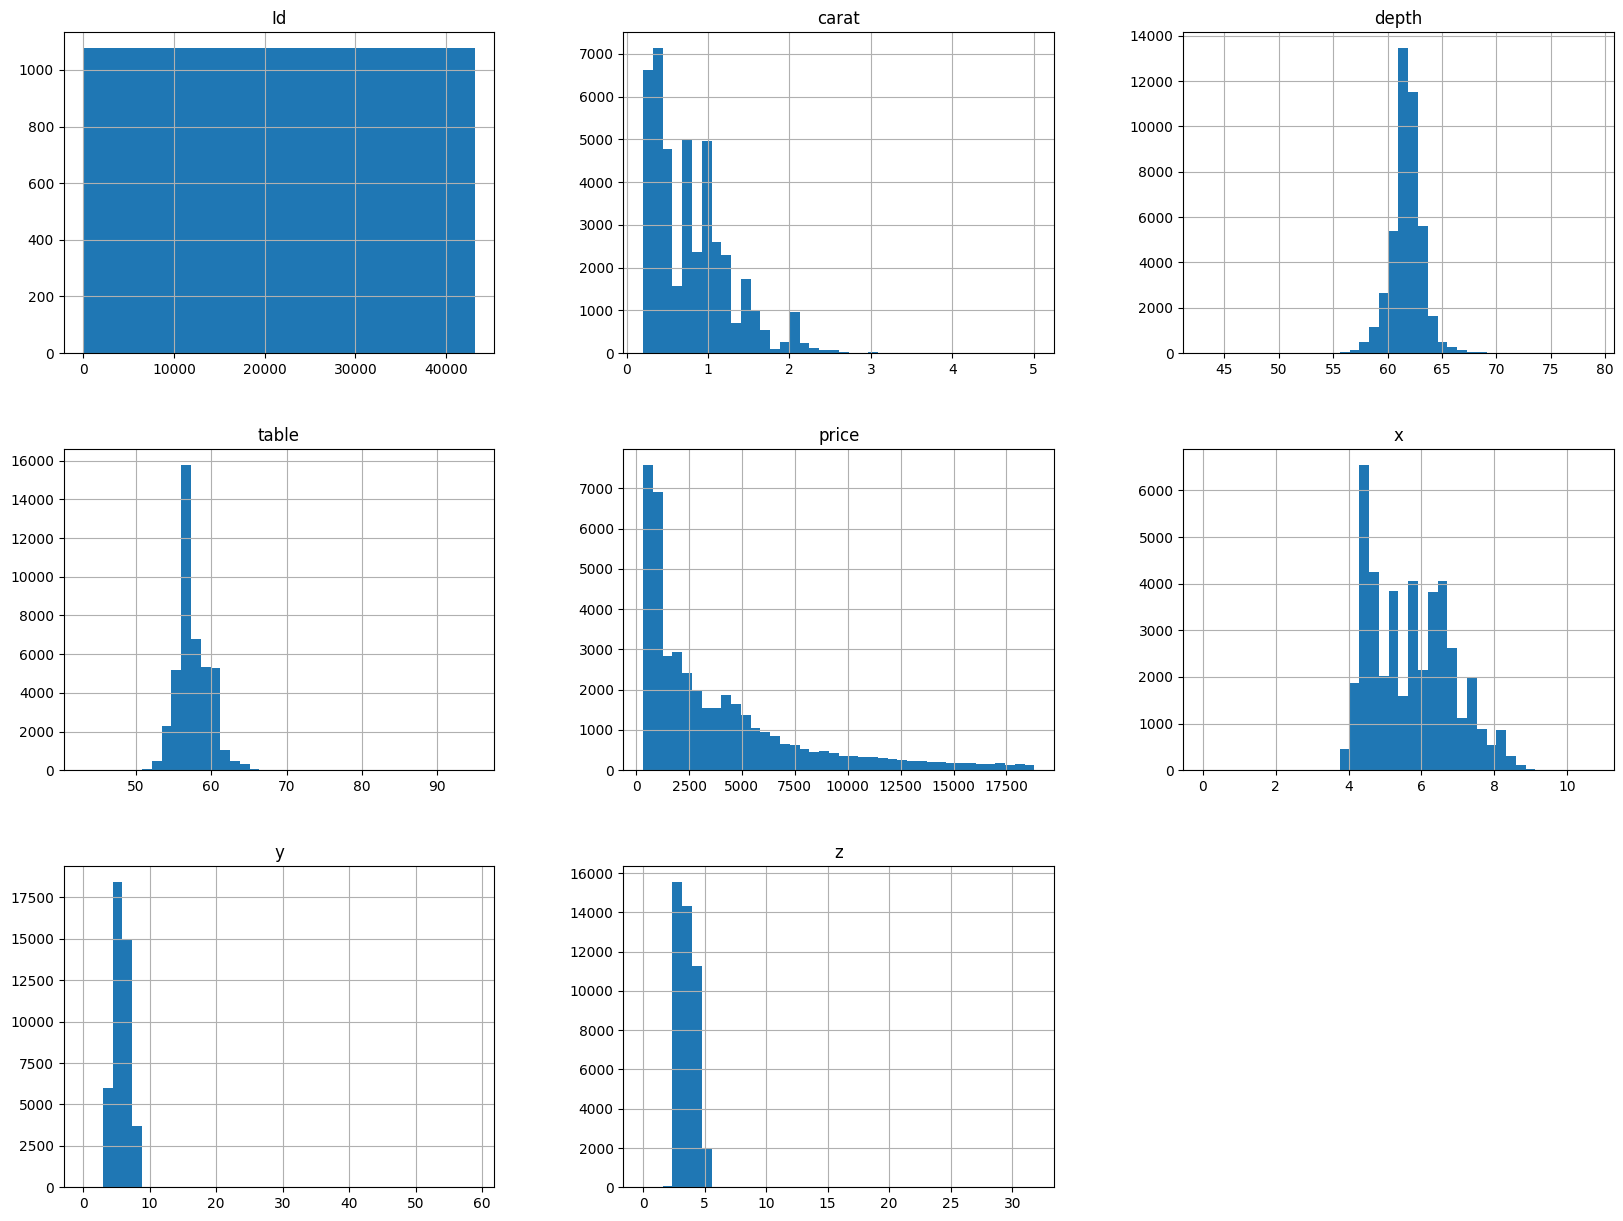

In [100]:
data.hist(bins=40, figsize =(20,15))
plt.show()

<Axes: xlabel='cut', ylabel='price'>

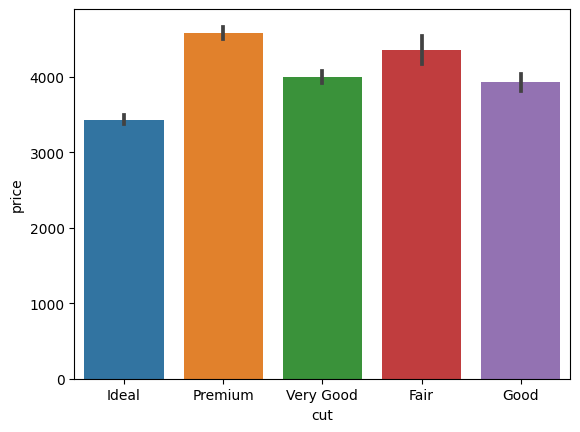

In [101]:
sns.barplot(data, x = 'cut', y='price')

<Axes: xlabel='color', ylabel='price'>

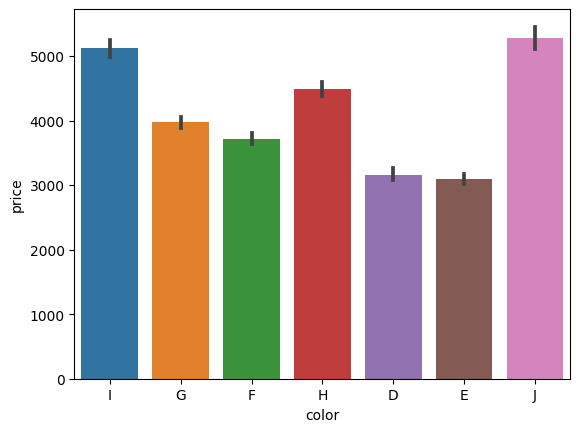

In [102]:
sns.barplot(data,x='color', y='price')

<Axes: xlabel='clarity', ylabel='price'>

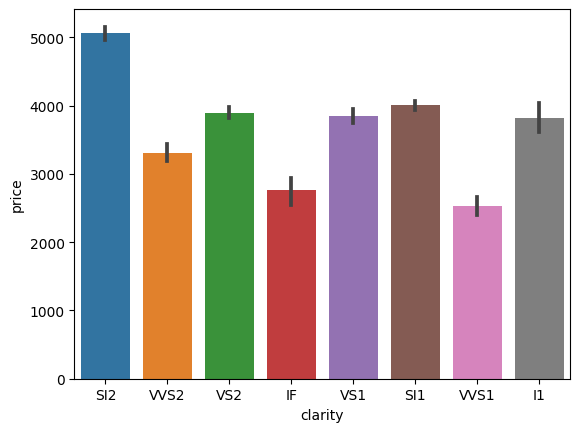

In [103]:
sns.barplot(data,x='clarity', y='price')

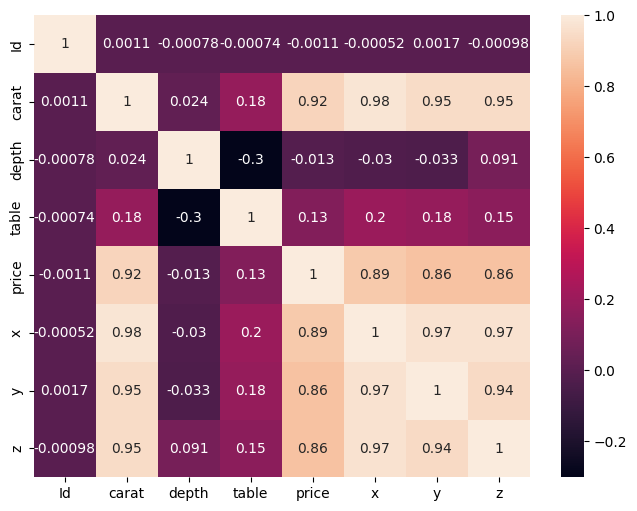

In [104]:
plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#Using LabelEncoder to transform categorical valuses to integer values to feed to our models

In [105]:
encoder_label_cut = LabelEncoder() 
encoder_label_color = LabelEncoder() 
encoder_label_clarity = LabelEncoder() 
data['cut'] = encoder_label_cut.fit_transform(data['cut']) 
data['color'] = encoder_label_color.fit_transform(data['color']) 
data['clarity'] = encoder_label_clarity.fit_transform(data['clarity'])

the labels from the rest of the data

In [106]:
x = data.drop(['price','Id'], axis=1) 
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [107]:
R2_Scores = [] 
Rmse_score = [] 
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' 
          , 'GradientBoosting Regression' , 'RandomForest Regression' , 'KNeighbours Regression']


#Training Linear Regression model

In [108]:
LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train) 

LinearRegression()

In [109]:
accuracies = cross_val_score(estimator =LR_Model, X = X_train, y=y_train, cv=5)
y_pred=LR_Model.predict(X_test)

print('####### Linear Regression #######') 
print('Score : ', LR_Model.score(X_test, y_test)) 
print(accuracies)

rmse = mean_squared_error(y_test, y_pred, squared = False) 
r2 = r2_score(y_test, y_pred)
print('RMSE   : %0.2f ' % rmse) 
print('R2     : %0.2f ' % r2)

Rmse_score.append(rmse)
R2_Scores.append(r2)



####### Linear Regression #######
Score :  0.8899510406968214
[0.88261311 0.88650783 0.87956481 0.8818427  0.88833735]
RMSE   : 1305.25 
R2     : 0.89 


#Training Lasso Regression model

In [110]:
LA_Model = Lasso()
LA_Model.fit(X_train , y_train)


Lasso()

In [111]:
accuracies = cross_val_score(estimator = LA_Model, X = X_train, y = y_train, cv = 5) 
y_pred = LA_Model.predict(X_test)

print('###### Lasso Regression ######') 
print('Score : %.4f' % LA_Model.score(X_test, y_test)) 
print(accuracies)
rmse = mean_squared_error(y_test, y_pred, squared = False) 
r2 = r2_score(y_test, y_pred)

print('')
print('RMSE   : %0.2f ' % rmse) 
print('R2     : %0.2f ' % r2)

Rmse_score.append(rmse)
R2_Scores.append(r2)


###### Lasso Regression ######
Score : 0.8903
[0.8825524  0.88656012 0.87964537 0.88530572 0.8881018 ]

RMSE   : 1303.12 
R2     : 0.89 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.393e+07, tolerance: 4.401e+07
  model = cd_fast.enet_coordinate_descent(


#Training AdaBoost Regression model

In [112]:
AB_Model = AdaBoostRegressor(n_estimators=1000) 
AB_Model.fit(X_train , y_train)

AdaBoostRegressor(n_estimators=1000)

In [113]:
accuracies = cross_val_score(estimator = AB_Model, X = X_train, y = y_train, cv = 5) 
y_pred = AB_Model.predict(X_test)

In [114]:
print('###### AdaBoost Regression ######') 
print('Score : %.4f' % AB_Model.score(X_test, y_test)) 
print(accuracies)
rmse = mean_squared_error(y_test, y_pred, squared = False) 
r2 = r2_score(y_test, y_pred)
print('') 
print('RMSE   : %0.2f ' % rmse) 
print('R2     : %0.2f ' % r2)

Rmse_score.append(rmse)
R2_Scores.append(r2)


###### AdaBoost Regression ######
Score : 0.8688
[0.8652021  0.88532658 0.86213322 0.84373312 0.86587461]

RMSE   : 1425.26 
R2     : 0.87 


In [115]:
RR_Model = Ridge()
RR_Model.fit(X_train , y_train)
accuracies = cross_val_score(estimator = RR_Model, X = X_train, y = y_train, cv = 5)
y_pred = RR_Model.predict(X_test)
print('###### Ridge Regression ######')
print('Score : %.4f' % RR_Model.score(X_test, y_test)) 
print(accuracies)
rmse = mean_squared_error(y_test, y_pred, squared = False) 
r2 = r2_score(y_test, y_pred)
print('') 
print('RMSE   : %0.2f ' % rmse) 
print('R2     : %0.2f ' % r2)
Rmse_score.append(rmse)
R2_Scores.append(r2)


###### Ridge Regression ######
Score : 0.8899
[0.88261088 0.8865183  0.8796033  0.88200035 0.88828261]

RMSE   : 1305.41 
R2     : 0.89 


#Training GradientBoosting Regression model

In [116]:
GB_Model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0,verbose = 1) 
GB_Model.fit(X_train , y_train)
accuracies = cross_val_score(estimator = GB_Model, X = X_train, y = y_train, cv = 5) 
y_pred = GB_Model.predict(X_test)
print('###### Gradient Boosting Regression #######') 
print('Score : %.4f' % GB_Model.score(X_test, y_test)) 
print(accuracies)
rmse = mean_squared_error(y_test, y_pred, squared = False) 
r2 = r2_score(y_test, y_pred)
print('') 
print('RMSE   : %0.2f ' % rmse) 
print('R2     : %0.2f ' % r2)
Rmse_score.append(rmse)
R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14141225.1213            1.98s
         2    12534960.0242            2.00s
         3    11204101.3903            2.01s
         4    10010277.8117            2.01s
         5     9031809.5967            1.92s
         6     8176244.8645            1.91s
         7     7413714.9231            1.83s
         8     6779010.7116            1.76s
         9     6213105.9033            1.69s
        10     5743164.1098            1.67s
        20     3191469.5920            1.34s
        30     2376814.0617            1.13s
        40     2083808.8781            0.97s
        50     1905040.3253            0.80s
        60     1769719.3169            0.64s
        70     1666631.9707            0.48s
        80     1587161.4135            0.32s
        90     1524689.9519            0.16s
       100     1475156.5930            0.00s
      Iter       Train Loss   Remaining Time 
         1    14140074.6315            1.15s
        

#Training RandomForest Regression model

In [117]:
RF_Model = RandomForestRegressor() 
RF_Model.fit(X_train , y_train)
accuracies = cross_val_score(estimator = RF_Model, X = X_train, y = y_train, cv = 5) 
y_pred = RF_Model.predict(X_test)
print('###### Random Forest ######') 
print('Score : %.4f' % RF_Model.score(X_test, y_test)) 
print(accuracies)
rmse = mean_squared_error(y_test, y_pred, squared = False) 
r2 = r2_score(y_test, y_pred) 
print('')
print('RMSE   : %0.2f ' % rmse) 
print('R2     : %0.2f ' % r2)
params_dict={'n_estimators':[100],
             'n_jobs':[-1],
             'max_features':["auto",'sqrt','log2']
}
RF_Model=GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='r2')
RF_Model.fit(X_train,y_train)
print('Score : %.4f' % RF_Model.score(X_test, y_test))
pred = RF_Model.predict(X_test) 
r2 = r2_score(y_test, pred) 
print('R2 : %0.2f ' % r2)
Rmse_score.append(rmse)
R2_Scores.append(r2)


###### Random Forest ######
Score : 0.9808
[0.97994796 0.97867298 0.97995903 0.97932446 0.97919781]

RMSE   : 544.55 
R2     : 0.98 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Score : 0.9806
R2 : 0.98 


#Training K Nearest Neighbors Regressor model

In [118]:
KNN_Model = KNeighborsRegressor() 
KNN_Model.fit(X_train , y_train)
accuracies = cross_val_score(estimator = KNN_Model, X = X_train, y = y_train, cv = 5,verbose = 1) 
y_pred = KNN_Model.predict(X_test)
print('###### KNeighbours Regression ######') 
print('Score : %.4f' % KNN_Model.score(X_test, y_test)) 
print(accuracies)
rmse = mean_squared_error(y_test, y_pred, squared = False) 
r2 = r2_score(y_test, y_pred)
print('') 
print('RMSE   : %0.2f ' % rmse) 
print('R2     : %0.2f ' % r2) 
n_neighbors=[]
for i in range (1,101,10):     n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,              'n_jobs':[-1]}
KNN_Model = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=params_dict, scoring='r2') 
KNN_Model.fit(X_train,y_train) 
print('Score : %.4f' % KNN_Model.score(X_test, y_test))
pred = KNN_Model.predict(X_test) 
r2 = r2_score(y_test, pred) 
print('R2     : %0.2f ' % r2)
Rmse_score.append(rmse)
R2_Scores.append(r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


###### KNeighbours Regression ######
Score : 0.9457
[0.94028913 0.94142703 0.94423249 0.94145511 0.93830335]

RMSE   : 917.19 
R2     : 0.95 
Score : 0.9468
R2     : 0.95 


In [119]:
dataFrame = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores, 'Rmse-Scores' : Rmse_score}) 
dataFrame.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores,Rmse-Scores
5,RandomForest Regression,0.980559,544.549680
6,KNeighbours Regression,0.946775,917.189925
4,GradientBoosting Regression,0.909727,1182.171220
1,Lasso Regression,0.890309,1303.122010
0,Linear Regression,0.889951,1305.248956
3,Ridge Regression,0.889924,1305.407441
2,AdaBoost Regression,0.868784,1425.259515


In [120]:
encoder = LabelEncoder()
Id = testData['Id'] 
testData = testData.drop('Id',axis=1) 
testData['cut'] = encoder.fit_transform(testData['cut']) 
testData['clarity'] = encoder.fit_transform(testData['clarity']) 
testData['color'] = encoder.fit_transform(testData['color']) 
testData.head()


,carat,cut,color,clarity,depth,table,x,y,z
0,0.34,2,3,7,61.1,57.0,4.52,4.48,2.75
1,0.71,3,1,5,62.7,58.0,5.74,5.68,3.58
2,0.44,4,5,4,62.8,56.0,4.83,4.88,3.05
3,0.81,3,1,3,60.1,59.0,6.09,6.03,3.65
4,0.40,2,3,6,61.2,56.0,4.74,4.80,2.92


Predicting our test Data

In [121]:
predictions = RF_Model.predict(testData)
data={'Id': Id, 'price':predictions } 
results = pd.DataFrame(data) 
results


,Id,price
0,1,932.19
1,2,2829.59
2,3,835.06
3,4,2835.27
4,5,1111.77
...,...,...
10783,10784,1804.50
10784,10785,6517.28
10785,10786,4510.10
10786,10787,4994.46


In [122]:
results.to_csv('FinalResults.csv',index=False)